In [1]:
import geopandas as gp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shapely
plt.style.use('seaborn')

%matplotlib inline

In [2]:
inhab_plz = gp.read_file("../results/berlin-inhabitants.geojson")

# Ausreißer 193 !!!! what the Fuck same PLZ, geringe fläche aber die selbe EInwohneranzahl wie 12559 ... reduziere auf 10 EInwohner

In [3]:
inhab_plz

,plz,first_dig_plz,einwohner,geometry
0,14109,1,10049,"POLYGON ((13.08835 52.41963, 13.09584 52.42198..."
1,14089,1,17734,"POLYGON ((13.10929 52.45063, 13.10956 52.45108..."
2,13591,1,26762,"POLYGON ((13.11738 52.51706, 13.11811 52.52010..."
3,13587,1,20108,"POLYGON ((13.12796 52.58313, 13.12934 52.58593..."
4,13593,1,20238,"POLYGON ((13.14288 52.52181, 13.14306 52.52179..."
...,...,...,...,...
193,12559,1,17643,"POLYGON ((13.58139 52.44185, 13.58151 52.44239..."
194,12559,1,17643,"POLYGON ((13.58177 52.44236, 13.58248 52.44299..."
195,12627,1,35353,"POLYGON ((13.59131 52.53367, 13.59148 52.53485..."
196,12587,1,17717,"POLYGON ((13.59408 52.45418, 13.59430 52.45452..."


In [4]:
inhab_plz.einwohner[193:194] = 1

<ipython-input-4-799b8683da4c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inhab_plz.einwohner[193:194] = 1


<AxesSubplot:>

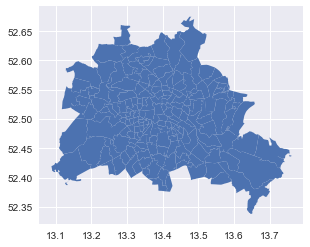

In [5]:
inhab_plz.plot()

In [6]:
from pyproj import Geod
from shapely import wkt

# specify a named ellipsoid
geod = Geod(ellps="WGS84")
area = abs(geod.geometry_area_perimeter(inhab_plz["geometry"][0])[0])
print('# Geodesic area: {:.3f} m^2'.format(area))


nlist = []
for i in range(len(inhab_plz)):
    nlist.append(abs(geod.geometry_area_perimeter(inhab_plz["geometry"][i])[0]))
nlist[0:10]
# # Geodesic area: 13205034.647 m^2

# Geodesic area: 25228864.822 m^2


[25228864.822468046,
 24888210.485740192,
 8988007.14226191,
 17478801.640618935,
 4561552.388685081,
 6903208.170846933,
 3942351.8594531785,
 20496134.114165206,
 2354013.059637749,
 5294865.113202442]

In [7]:
inhab_plz["area_m2"] = nlist

In [8]:
inhab_plz["area_km2"] = inhab_plz["area_m2"]/1000000

In [9]:
inhab_plz

,plz,first_dig_plz,einwohner,geometry,area_m2,area_km2
0,14109,1,10049,"POLYGON ((13.08835 52.41963, 13.09584 52.42198...",2.522886e+07,25.228865
1,14089,1,17734,"POLYGON ((13.10929 52.45063, 13.10956 52.45108...",2.488821e+07,24.888210
2,13591,1,26762,"POLYGON ((13.11738 52.51706, 13.11811 52.52010...",8.988007e+06,8.988007
3,13587,1,20108,"POLYGON ((13.12796 52.58313, 13.12934 52.58593...",1.747880e+07,17.478802
4,13593,1,20238,"POLYGON ((13.14288 52.52181, 13.14306 52.52179...",4.561552e+06,4.561552
...,...,...,...,...,...,...
193,12559,1,1,"POLYGON ((13.58139 52.44185, 13.58151 52.44239...",2.820620e+03,0.002821
194,12559,1,17643,"POLYGON ((13.58177 52.44236, 13.58248 52.44299...",3.761828e+07,37.618275
195,12627,1,35353,"POLYGON ((13.59131 52.53367, 13.59148 52.53485...",3.985389e+06,3.985389
196,12587,1,17717,"POLYGON ((13.59408 52.45418, 13.59430 52.45452...",1.529608e+07,15.296081


# TEST

https://www.bing.com/search?q=berlin+fl%C3%A4che&cvid=95631a86c9f64a0b84639be308543a3d&pglt=43&FORM=ANNTA1&PC=U531

~ 891,7 km²


In [10]:
inhab_plz["area_km2"].sum()

891.2474882097497

# Einwohner anzahl

In [11]:
inhab_plz["einwohner"].sum()

3426133

# X Einwohner pro km2 

In [12]:
inhab_plz["einwohner"].sum() / inhab_plz["area_km2"].sum() 

3844.199333321072

In [13]:
inhab_plz["area_km2"].sum() / inhab_plz["einwohner"].sum()

0.00026013219224406924

In [14]:
inhab_plz["einwohner_km2"] = inhab_plz["einwohner"] / inhab_plz["area_km2"]
inhab_plz["einwohner_m2"] = inhab_plz["einwohner"] / inhab_plz["area_m2"]

In [15]:
inhab_plz["einwohner_km2"][0:5]
#[geopy.distance.geodesic(point,start_point).meters for point in zip(long,lat)]

0     398.313601
1     712.546208
2    2977.523224
3    1150.422118
4    4436.647500
Name: einwohner_km2, dtype: float64

In [16]:
inhab_plz['einwohner_km2'] = inhab_plz['einwohner_km2'].round(decimals=3)

In [17]:
inhab_plz['einwohner_m2'] = inhab_plz['einwohner_m2'].round(decimals=6)

In [18]:
inhab_plz.describe()

,einwohner,area_m2,area_km2,einwohner_km2,einwohner_m2
count,198.000000,1.980000e+02,198.000000,198.000000,198.000000
mean,17303.702020,4.501250e+06,4.501250,20448.872515,0.020449
std,6427.008404,5.386013e+06,5.386013,77865.821950,0.077866
min,1.000000,2.820620e+03,0.002821,94.607000,0.000095
25%,13417.000000,1.463890e+06,1.463890,3082.145250,0.003082
50%,17062.000000,2.900474e+06,2.900474,6242.390500,0.006242
75%,21598.750000,5.789695e+06,5.789695,12328.896250,0.012329
max,35353.000000,3.761828e+07,37.618275,666781.365000,0.666781


In [19]:
len(inhab_plz[inhab_plz['einwohner_km2']<15500])

164

In [20]:
inhab_plz.to_file("../results/berlin-inhabitants-improved.geojson", driver='GeoJSON')

In [21]:
top3inhab_plz = inhab_plz.sort_values(by='einwohner_km2', ascending=False).head(3)
top5inhab_plz = inhab_plz.sort_values(by='einwohner_km2', ascending=False).head(5)

In [22]:
top3inhab_plz.to_file("../results/berlin-inhabitants-top3.geojson", driver='GeoJSON')
top5inhab_plz.to_file("../results/berlin-inhabitants-top5.geojson", driver='GeoJSON')

In [23]:
tail3inhab_plz = inhab_plz.sort_values(by='einwohner_km2', ascending=False).tail(3)
tail5inhab_plz = inhab_plz.sort_values(by='einwohner_km2', ascending=False).tail(5)

In [24]:
tail3inhab_plz.to_file("../results/berlin-inhabitants-tail3.geojson", driver='GeoJSON')
tail5inhab_plz.to_file("../results/berlin-inhabitants-tail5.geojson", driver='GeoJSON')

In [25]:
tail3inhab_plz

,plz,first_dig_plz,einwohner,geometry,area_m2,area_km2,einwohner_km2,einwohner_m2
193,12559,1,1,"POLYGON ((13.58139 52.44185, 13.58151 52.44239...",2.820620e+03,0.002821,354.532,0.000355
102,13159,1,1762,"POLYGON ((13.36691 52.62544, 13.36697 52.62547...",1.093987e+07,10.939874,161.062,0.000161
18,14053,1,139,"POLYGON ((13.22312 52.51329, 13.22489 52.51423...",1.469243e+06,1.469243,94.607,0.000095


In [26]:
#from shapely.geometry import Point
#center_list = []
#for i in range(len(inhab_plz)):
#    center_list.append(Point(inhab_plz["geometry"][i].centroid.coords))

In [27]:
inhab_plz_point = inhab_plz

In [28]:
inhab_plz_point["geometry"] = inhab_plz["geometry"].centroid

<ipython-input-28-db461ff8800e>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  inhab_plz_point["geometry"] = inhab_plz["geometry"].centroid


In [29]:
inhab_plz_point.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   plz            198 non-null    object  
 1   first_dig_plz  198 non-null    object  
 2   einwohner      198 non-null    int64   
 3   geometry       198 non-null    geometry
 4   area_m2        198 non-null    float64 
 5   area_km2       198 non-null    float64 
 6   einwohner_km2  198 non-null    float64 
 7   einwohner_m2   198 non-null    float64 
dtypes: float64(4), geometry(1), int64(1), object(2)
memory usage: 12.5+ KB


In [30]:
inhab_plz_point.to_file("../results/berlin-inhabitants-centerpoints.geojson", driver='GeoJSON')

In [31]:
top3inhab_plz_points = inhab_plz_point.sort_values(by='einwohner_km2', ascending=False).head(3)
top5inhab_plz_points = inhab_plz_point.sort_values(by='einwohner_km2', ascending=False).head(5)

In [32]:
top5inhab_plz_points

,plz,first_dig_plz,einwohner,geometry,area_m2,area_km2,einwohner_km2,einwohner_m2
58,10623,1,5680,POINT (13.31943 52.50234),8518.534412,0.008519,666781.365,0.666781
101,12107,1,19767,POINT (13.40439 52.44134),33683.063698,0.033683,586852.793,0.586853
190,12623,1,27373,POINT (13.57961 52.48101),60427.724456,0.060428,452987.437,0.452987
182,12679,1,25823,POINT (13.57525 52.54533),58814.767518,0.058815,439056.398,0.439056
114,12305,1,20742,POINT (13.41718 52.40546),121144.852985,0.121145,171216.519,0.171217


In [67]:
top3inhab_plz_points.to_file("../results/berlin-inhabitants-centerpoints-top3.geojson", driver='GeoJSON')
top5inhab_plz_points.to_file("../results/berlin-inhabitants-centerpoints-top5.geojson", driver='GeoJSON')

In [68]:
tail3inhab_plz_points = inhab_plz_point.sort_values(by='einwohner_km2', ascending=False).tail(3)
tail5inhab_plz_points = inhab_plz_point.sort_values(by='einwohner_km2', ascending=False).tail(5)

In [69]:
tail3inhab_plz_points.to_file("../results/berlin-inhabitants-centerpoints-tail3.geojson", driver='GeoJSON')
tail5inhab_plz_points.to_file("../results/berlin-inhabitants-centerpoints-tail5.geojson", driver='GeoJSON')

In [70]:
tail5inhab_plz_points

,plz,first_dig_plz,einwohner,geometry,area_m2,area_km2,einwohner_km2,einwohner_m2
0,14109,1,10049,POINT (13.14399 52.41974),2.522886e+07,25.228865,398.314,0.000398
186,12527,1,9425,POINT (13.63382 52.38563),2.620787e+07,26.207873,359.625,0.000360
193,12559,1,1,POINT (13.58170 52.44200),2.820620e+03,0.002821,354.532,0.000355
102,13159,1,1762,POINT (13.39499 52.62179),1.093987e+07,10.939874,161.062,0.000161
18,14053,1,139,POINT (13.23820 52.51536),1.469243e+06,1.469243,94.607,0.000095


In [71]:
tail3inhab_plz_points

,plz,first_dig_plz,einwohner,geometry,area_m2,area_km2,einwohner_km2,einwohner_m2
193,12559,1,1,POINT (13.58170 52.44200),2.820620e+03,0.002821,354.532,0.000355
102,13159,1,1762,POINT (13.39499 52.62179),1.093987e+07,10.939874,161.062,0.000161
18,14053,1,139,POINT (13.23820 52.51536),1.469243e+06,1.469243,94.607,0.000095
